<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/Taguchi_FORM12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023**

# **Parte I: CAPÍTULO 9 Introducción al diseño robusto (Taguchi) - Humberto Gutierrez - Román de la Vara. Ejemplo, pág. 314**
## **1. Ejemplo integrador**



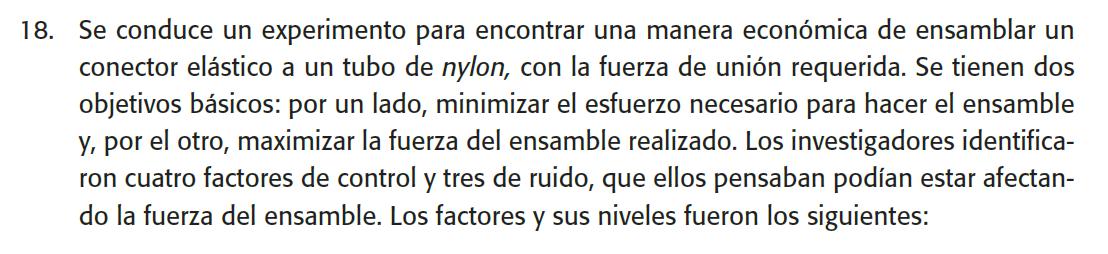

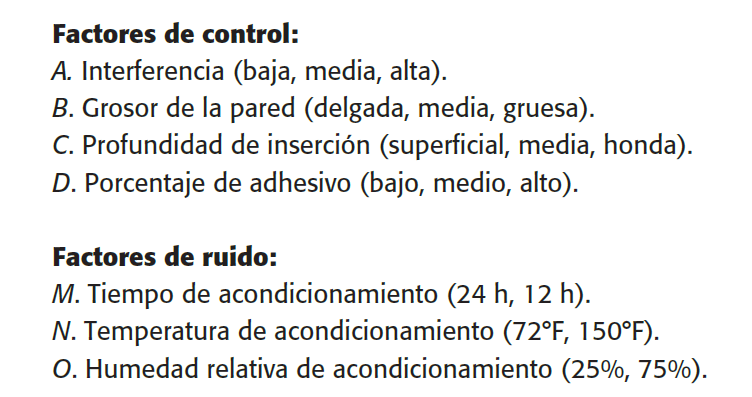

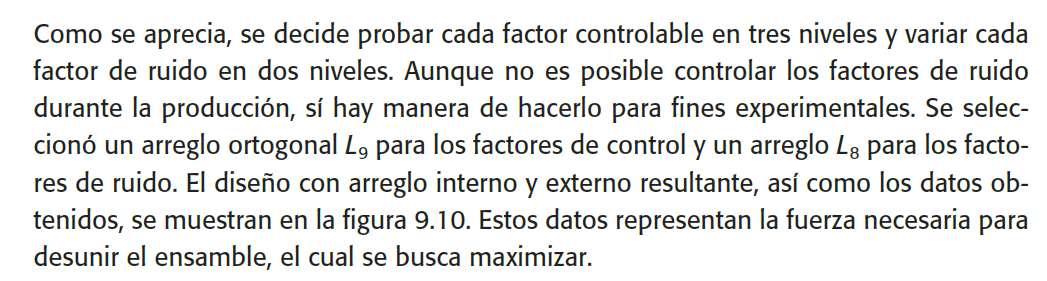

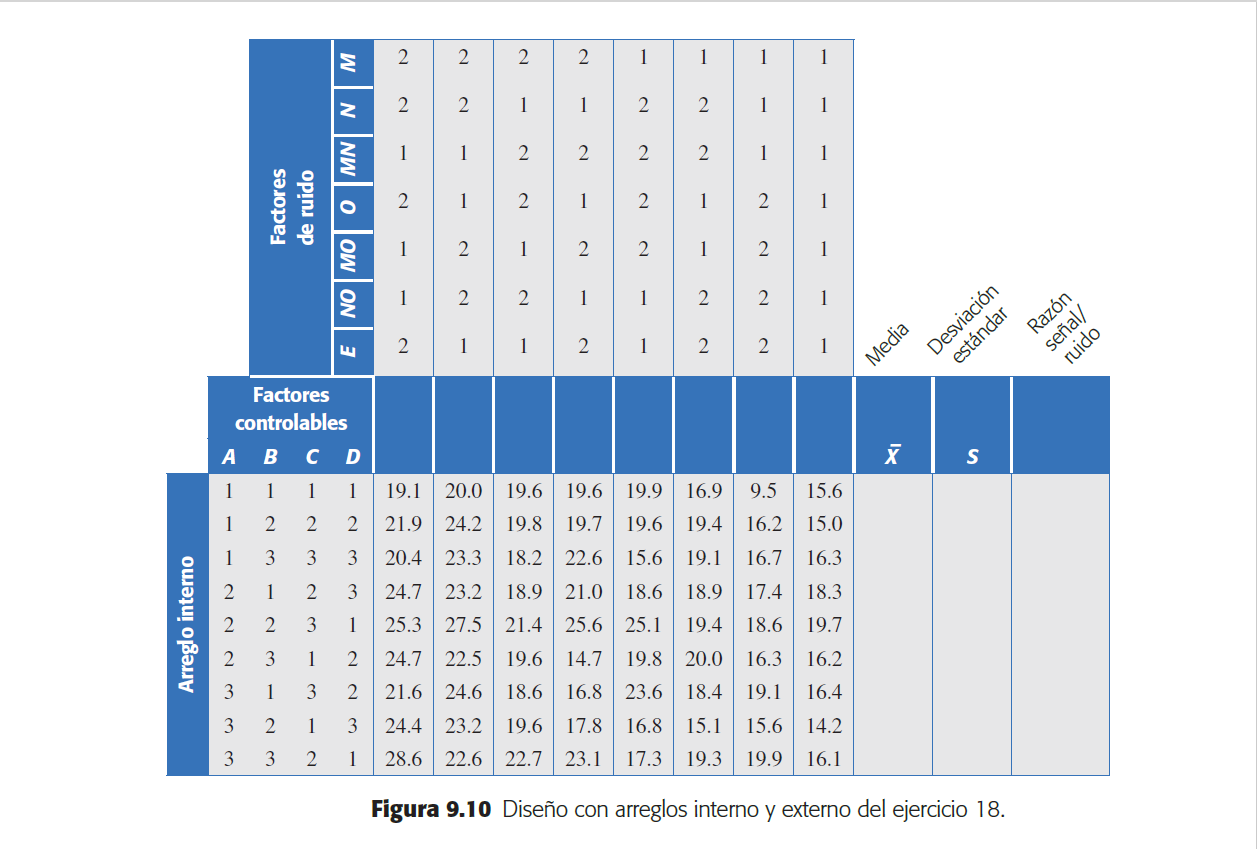


## **2. Librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Datos**

In [ ]:
import pandas as pd

data = {
    'A': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'B': [1, 2, 3, 1, 2, 3, 1, 2, 3],
    'C': [1, 2, 3, 2, 3, 1, 1, 3, 2],
    'D': [1, 2, 3, 3, 1, 2, 2, 3, 1],
    'media' : [17.525, 19.475,	19.025,	20.125,	22.825,	19.225,	19.8875,	18.3375,	21.2],
'desviacion' : [3.613, 2.907,	2.883,	2.598,	3.428,	3.380,	3.050,	3.775,	3.948],
    'mas_grande_mejor':[24.025,25.522,25.335,25.904,26.908,25.326,25.719,24.832,26.152]

}




## **4. Nuestro DataFrame**

In [ ]:
datos = pd.DataFrame(data)
print(datos)

   A  B  C  D    media  desviacion  mas_grande_mejor
0  1  1  1  1  17.5250       3.613            24.025
1  1  2  2  2  19.4750       2.907            25.522
2  1  3  3  3  19.0250       2.883            25.335
3  2  1  2  3  20.1250       2.598            25.904
4  2  2  3  1  22.8250       3.428            26.908
5  2  3  1  2  19.2250       3.380            25.326
6  3  1  1  2  19.8875       3.050            25.719
7  3  2  3  3  18.3375       3.775            24.832
8  3  3  2  1  21.2000       3.948            26.152


# **5. Efectos Principales**
## **a. Se toman los niveles del factor que maximizan la señal ruido**

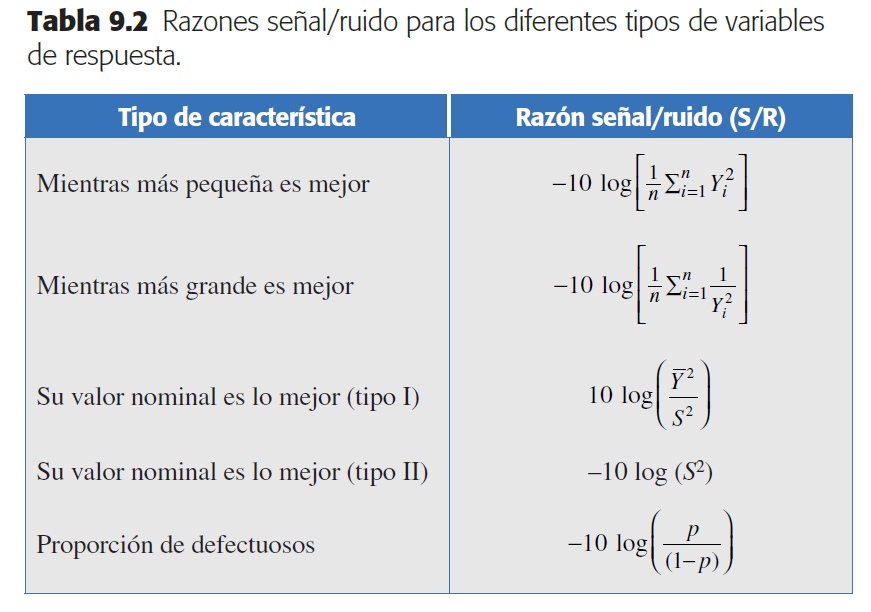

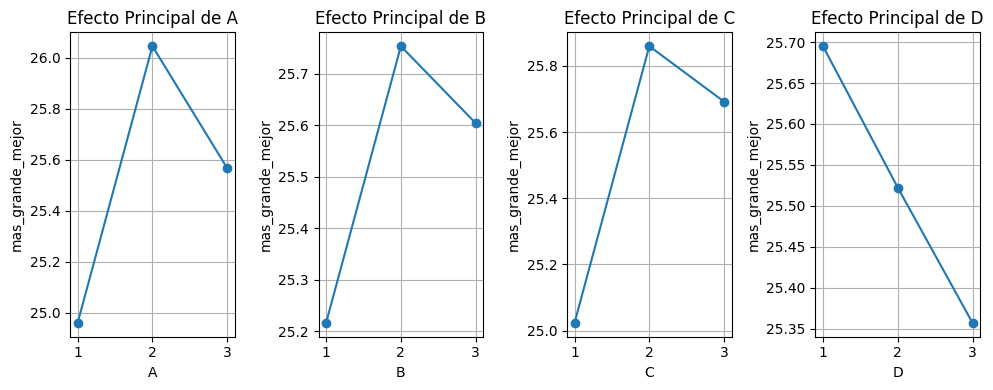

In [ ]:

# Crear gráficos de efectos principales para cada factor en una sola fila
factors = datos.columns[:-3]  # Excluyendo la columna 'media' y 'desviacion

fig, axes = plt.subplots(1, len(factors), figsize=(10, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'mas_grande_mejor']].groupby(factor).mean()
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('mas_grande_mejor')
    ax.set_title(f'Efecto Principal de {factor}')
    ax.grid(True)

plt.tight_layout()
plt.show()


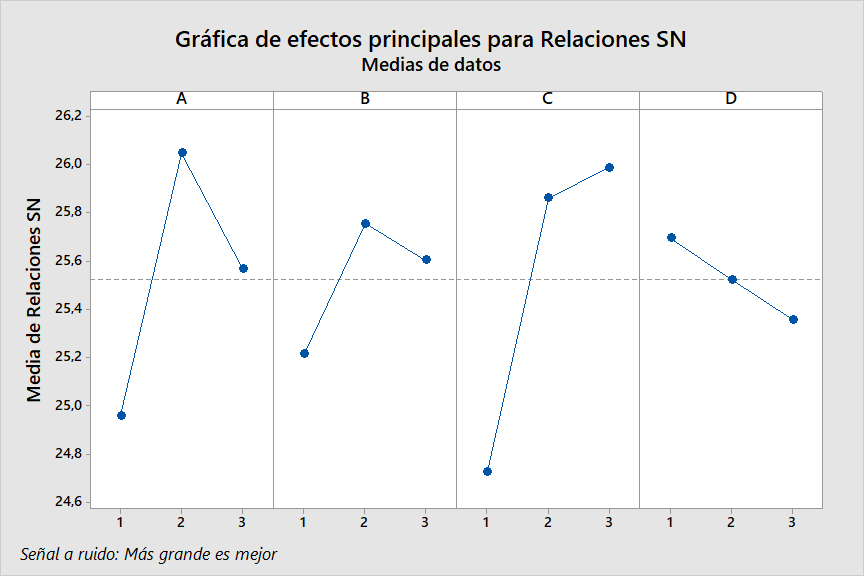

## **b. Se toman los niveles del Factor que Maximizan la Media**

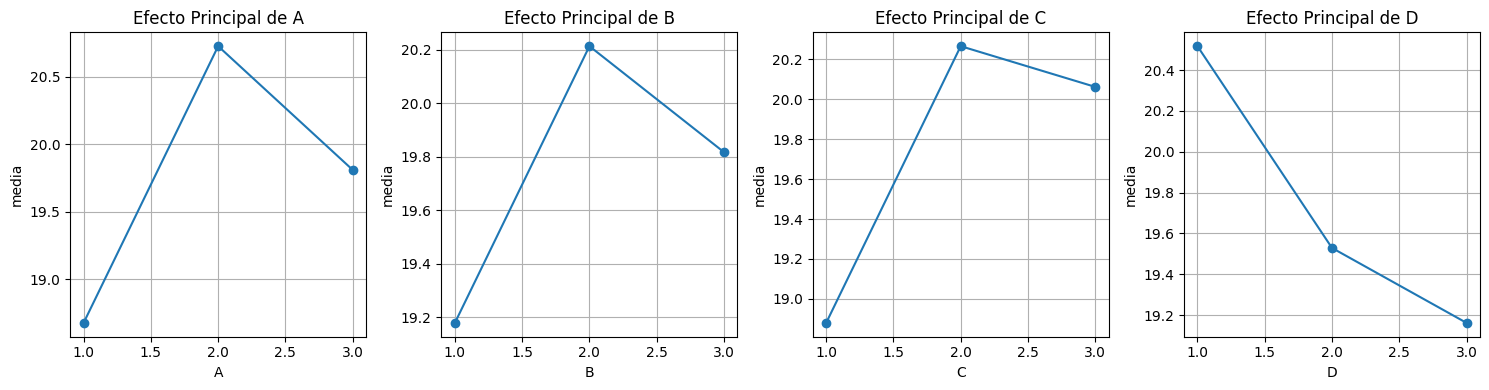

In [ ]:

# Crear gráficos de efectos principales para cada factor en una sola fila
factors = datos.columns[:-3]  # Excluyendo la columna 'media' y 'desviacion

fig, axes = plt.subplots(1, len(factors), figsize=(15, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'media']].groupby(factor).mean()
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('media')
    ax.set_title(f'Efecto Principal de {factor}')
    ax.grid(True)

plt.tight_layout()
plt.show()


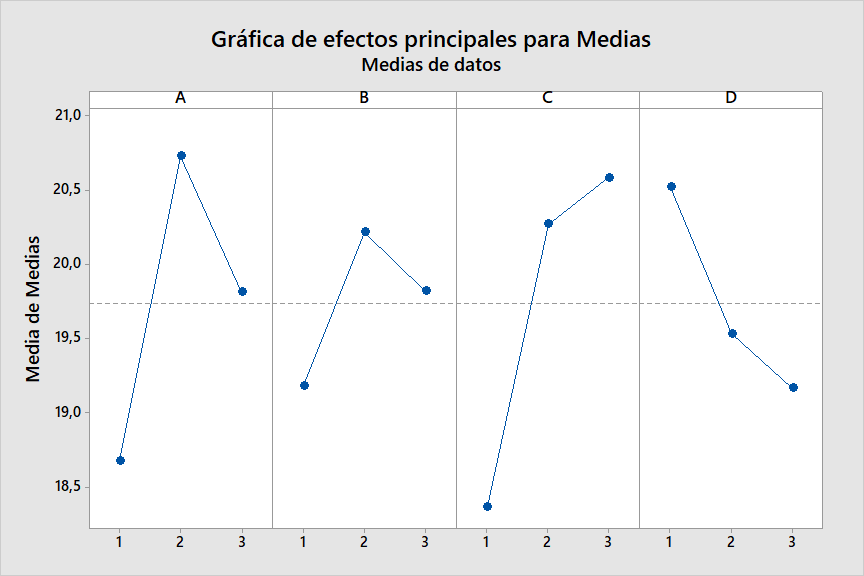

# **6. BoxPlot para la media**

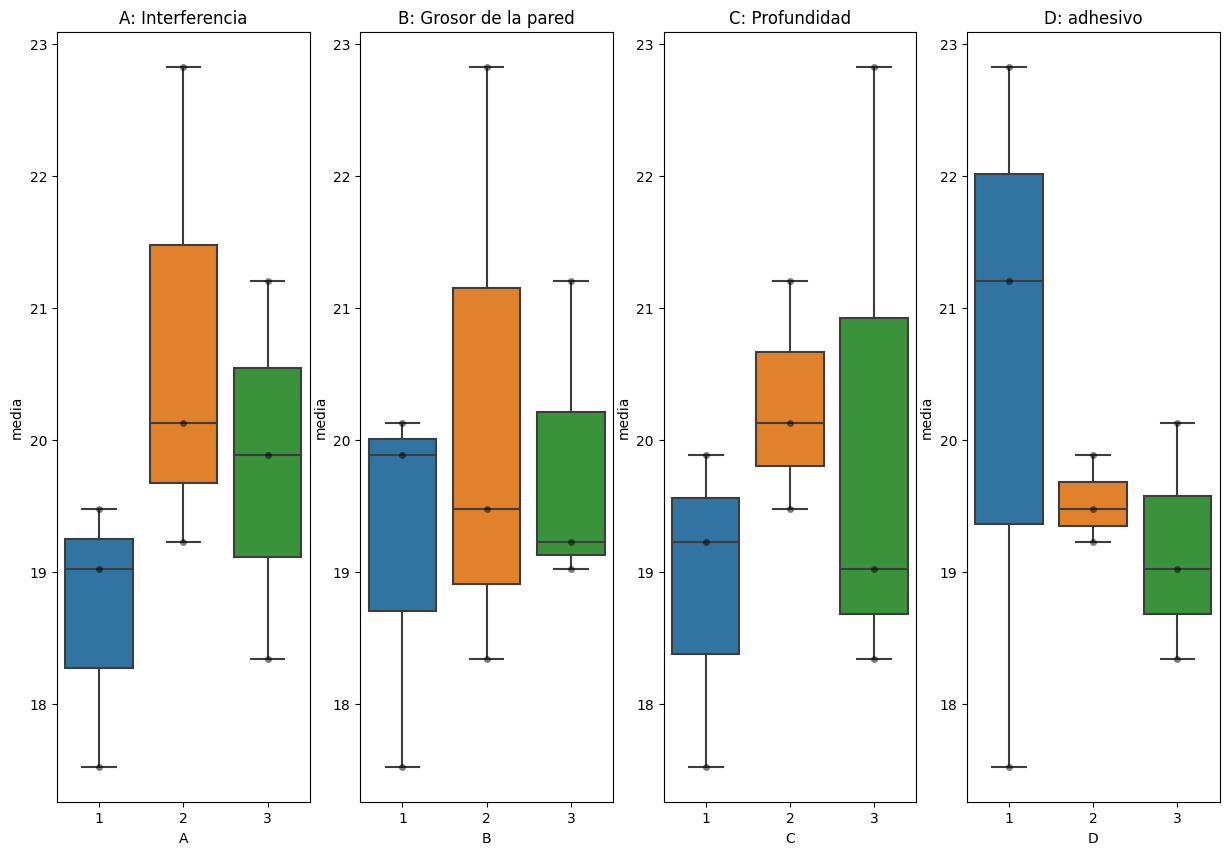

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
axs[0].set_title('A: Interferencia')
sns.boxplot(x="A", y="media", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('B: Grosor de la pared')
sns.boxplot(x="B", y="media", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('C: Profundidad')
sns.boxplot(x="C", y="media", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('D: adhesivo')
sns.boxplot(x="D", y="media", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="media", data=datos, color='black',
              alpha = 0.5, ax=axs[3]);


# **7. BoxPlot para la señal - ruido**

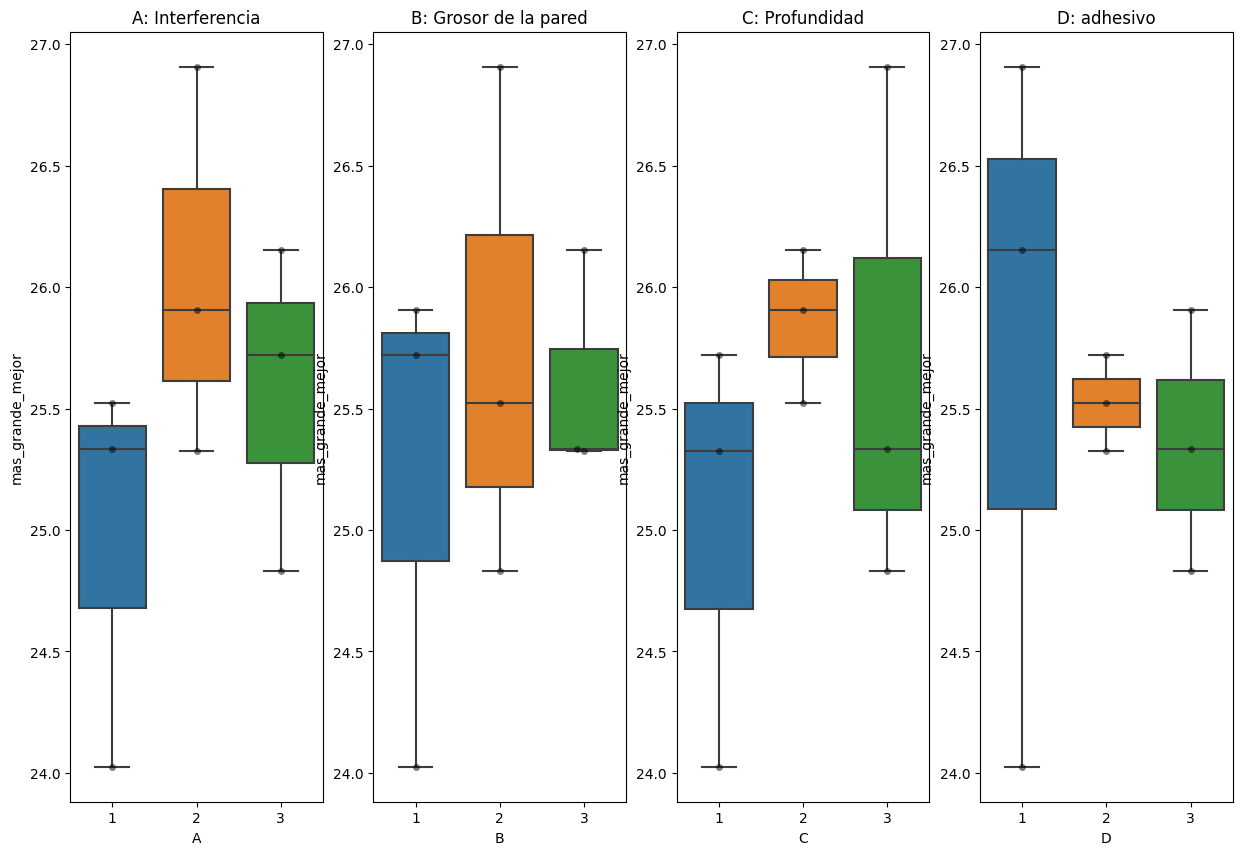

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
axs[0].set_title('A: Interferencia')
sns.boxplot(x="A", y="mas_grande_mejor", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="mas_grande_mejor", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('B: Grosor de la pared')
sns.boxplot(x="B", y="mas_grande_mejor", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="mas_grande_mejor", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('C: Profundidad')
sns.boxplot(x="C", y="mas_grande_mejor", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="mas_grande_mejor", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('D: adhesivo')
sns.boxplot(x="D", y="mas_grande_mejor", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="mas_grande_mejor", data=datos, color='black',
              alpha = 0.5, ax=axs[3]);


In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

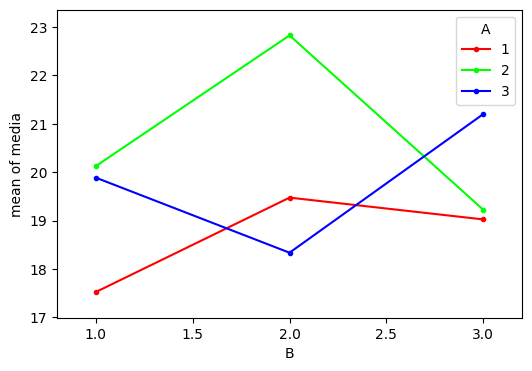

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.A,
    response = datos.media,
    ax       = ax,
)

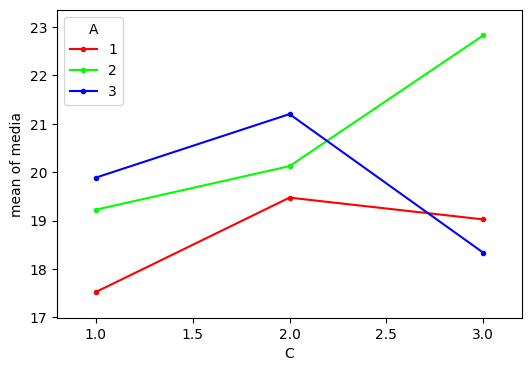

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.C,
    trace    = datos.A,
    response = datos.media,
    ax       = ax,
)

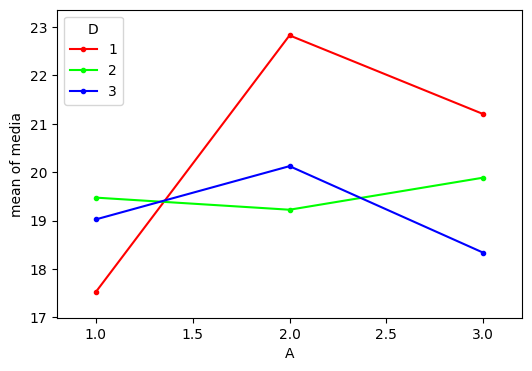

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.D,
    response = datos.media,
    ax       = ax,
)

# **8. No es posible el anova con todos los efectos**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **a. Anova con los Efectos Principales**

In [ ]:
modelo1 = ols("media ~ (A+B+C+D)", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

           df     sum_sq   mean_sq         F    PR(>F)
A         1.0   1.926667  1.926667  0.744555  0.436870
B         1.0   0.609609  0.609609  0.235582  0.652801
C         1.0   1.590498  1.590498  0.614644  0.476868
D         1.0   5.061105  5.061105  1.955851  0.234511
Residual  4.0  10.350697  2.587674       NaN       NaN


In [ ]:
modelo2 = sm.OLS.from_formula("media ~ (A+B+C+D)", data = datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8877
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.545
Time:                        21:41:51   Log-Likelihood:                -13.400
No. Observations:                   9   AIC:                             36.80
Df Residuals:                       4   BIC:                             37.79
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7099      2.389      7.830      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# **b. Optimización del Modelo con la media**

In [ ]:
modelo2.params

Intercept    18.709921
A             0.566667
B             0.013988
C             0.914286
D            -0.981845
dtype: float64

In [ ]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, b1, b2, b3, b4, = modelo2.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b4',b4]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 18.710                       |
+----------------+------------------------------+
| b1             | 0.567                        |
+----------------+------------------------------+
| b2             | 0.014                        |
+----------------+------------------------------+
| b3             | 0.914                        |
+----------------+------------------------------+
| b4             | -0.982                       |
+----------------+------------------------------+


In [ ]:
from scipy.optimize import minimize

# Define la función que deseas minimizar se antepone el signo (-)
def funcion(x):
    return -(b0+b1*x[0] + b2*x[1] + b3*x[2] + b4*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(1,  3), (1,  3), (1,  3), (1,  3)]

# Suprimir la salida de la optimización
res = minimize(funcion, [2, 2, 2, 2], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print(f'función a optimizar es f = {round(b0,3)}+{round(b1,3)}A+{round(b2,3)}B+{round(b3,3)}C+{round(b4,3)}D')
print("x:", res.x)
print("Valor Máximo:", -res.fun)


Resultado óptimo:
función a optimizar es f = 18.71+0.567A+0.014B+0.914C+-0.982D
x: [3. 3. 3. 1.]
Valor Máximo: 22.212896825396804


# **c. Optimizacion del Modelo con la señal ruido**

In [ ]:
modelo3 = sm.OLS.from_formula("mas_grande_mejor ~ (A+B+C+D)", data = datos).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:       mas_grande_mejor   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                 -0.332
Method:                 Least Squares   F-statistic:                    0.5020
Date:                Tue, 17 Oct 2023   Prob (F-statistic):              0.740
Time:                        21:56:17   Log-Likelihood:                -8.5512
No. Observations:                   9   AIC:                             27.10
Df Residuals:                       4   BIC:                             28.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5882      1.394     17.636      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
modelo3.params

Intercept    24.588206
A             0.303500
B             0.054548
C             0.418857
D            -0.308619
dtype: float64

In [ ]:
t4 = Texttable()
b0, A1, B2, C3, D4, = modelo3.params
# Tabla Resumen

t4.add_rows([['Parametro = bi','valor de bi para el modelo 3' ],
           ['b0',	b0],
           ['A1',	A1],
           ['B2',	B2],
           ['C3',	C3],
           ['D4',D4]
           ])
print(t4.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 3 |
+================+==============================+
| b0             | 24.588                       |
+----------------+------------------------------+
| A1             | 0.303                        |
+----------------+------------------------------+
| B2             | 0.055                        |
+----------------+------------------------------+
| C3             | 0.419                        |
+----------------+------------------------------+
| D4             | -0.309                       |
+----------------+------------------------------+


In [ ]:
from scipy.optimize import minimize

# Define la función que deseas minimizar se antepone el signo (-)
def funcion(x):
    return -(b0+A1*x[0] + B2*x[1] + C3*x[2] + D4*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(1,  3), (1,  3), (1,  3), (1,  3)]

# Suprimir la salida de la optimización
res = minimize(funcion, [2, 2, 2, 2], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print(f'función a optimizar es f = {round(b0,3)}+{round(b1,3)}A+{round(b2,3)}B+{round(b3,3)}C+{round(b4,3)}D')
print("x:", res.x)
print("Valor Máximo:", -res.fun)


Resultado óptimo:
función a optimizar es f = 24.588+0.303A+0.055B+0.419C+-0.309D
x: [3. 3. 3. 1.]
Valor Máximo: 26.610301587301574


# **9.0 Aplicando la Metodologia de Taguchi correctamente**

In [ ]:
# Define las funciones f(x, y, z) y g(x, y, z)
def media(A, B, C,D):
    return 18.71+0.567*A+0.014*B+0.914*C+-0.982*D

def señal(A, B, C,D):
    return 24.588+0.303*A+0.055*B+0.419*C+-0.309*D

# Puntos en los que deseas evaluar las funciones
punto1 = [3, 3, 3, 1] # Punto analitico no pertenece a la configuración L_9
punto2 = [2, 2, 3, 1] # Punto Observado si pertenece a la configuración L_9

# Evalúa las funciones en los puntos
resultado1_f = media(punto1[0], punto1[1], punto1[2], punto1[3])
resultado1_g = señal(punto1[0], punto1[1], punto1[2], punto1[3])

resultado2_f = media(punto2[0], punto2[1], punto2[2], punto2[3])
resultado2_g = señal(punto2[0], punto2[1], punto2[2], punto2[3])

# Imprime los resultados
print("Resultados en el punto1 =  [3, 3, 3, 1] obtenido con Analíticamente:")
print("media =", resultado1_f)
print("señal =", resultado1_g)

print("\nResultados en el punto2 = [2, 2, 3, 1] obtenido con Taguchi:")
print("media =", resultado2_f)
print("señal =", resultado2_g)


Resultados en el punto1 =  [3, 3, 3, 1] obtenido con Analíticamente:
media = 22.213000000000005
señal = 26.61

Resultados en el punto2 = [2, 2, 3, 1] obtenido con Taguchi:
media = 21.632
señal = 26.252000000000002
